14:42:17 - cmdstanpy - INFO - Chain [1] start processing
14:42:17 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Error (MAE): 24.603105140579075
Mean Squared Error (MSE): 749.7565497869595
Root Mean Squared Error (RMSE): 27.381682742062427


C:\Users\99890\AppData\Local\Temp\ipykernel_11736\3255470349.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['ds'] = pd.to_datetime(test_data['ds'])


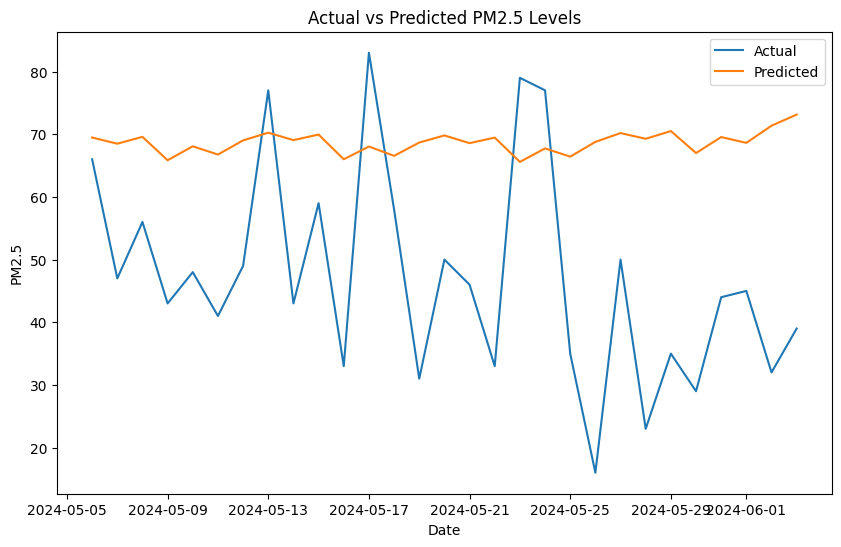

In [14]:
import pandas as pd
from prophet import Prophet
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the processed data
data_path = 'X:\\DS projects\\aqi_prediction_app\\data\\processed\\processed_data.csv'
data = pd.read_csv(data_path)

# Prepare data for Prophet
data = data.rename(columns={'date': 'ds', 'pm25': 'y'})
data['ds'] = pd.to_datetime(data['ds'])  # Ensure 'ds' is datetime

# Train-test split
train_data = data[:-30]  # Use all data except the last 30 days for training
test_data = data[-30:]   # Use the last 30 days for testing

# Initialize and train the model
model = Prophet()
model.fit(train_data)


# Make predictions
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

# Extract predictions for the test period
predicted_test_data = forecast[['ds', 'yhat']].tail(30)

# Ensure 'ds' columns are datetime
test_data['ds'] = pd.to_datetime(test_data['ds'])
predicted_test_data['ds'] = pd.to_datetime(predicted_test_data['ds'])

# Merge actual and predicted data
test_data = test_data.rename(columns={'y': 'actual'})
merged_data = pd.merge(test_data, predicted_test_data, on='ds')

# Evaluate the model
mae = mean_absolute_error(merged_data['actual'], merged_data['yhat'])
mse = mean_squared_error(merged_data['actual'], merged_data['yhat'])
rmse = mse ** 0.5

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(merged_data['ds'], merged_data['actual'], label='Actual')
plt.plot(merged_data['ds'], merged_data['yhat'], label='Predicted')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Actual vs Predicted PM2.5 Levels')
plt.legend()
plt.show()

In [27]:
# Save the model
model_path = 'X:\\DS projects\\aqi_prediction_app\\data\\models\\prophet_model.pkl'
joblib.dump(model, model_path)

print(f"Model trained and saved to {model_path}")


Model trained and saved to X:\DS projects\aqi_prediction_app\data\models\prophet_model.pkl
